# Sale Data Exploration

As everyone is experiencing the hike of prices around the country. I am interested building a dashboard to show the trends of spending and compare among regions, gender, goods categories and more. The purpose of the exploration is to see what trends emerge from the data with different filters. Furthermore, this code should be reusable for future data update.

In this demonstration, I am adopting Bobby's Ipywidgets Dashboard with my own charts and graphs to show the sales of 17 days in 2016.

1. Vizualization techniques:
The techniques in the notebook are:
- **Heat Map:** Heat map is great to show 3 dimensional of the data. It is included at the exploratory step of this notebook.
- **Box Plot:** Box plot is also at the exploratory step of the notebook to analyze data as a whole. This plot is good to compare the distribution of 2 or more categories
- **Histogram to compare 2 or more population:** This is a more emphasize plot to compare population such as between gender, or payment methods.
- **Historgram with KDE:** Histogram plot shows the distribution of the population. This plot is helpful to see the the customer's age or spending invoice distribution. Understanding this will help management to improve their marketing strategies. Historgram will be part of the interactive dashboard.
- **Line plot:** Line plot is good to see the trend or revenue and profit over time.
- **Pie chart:** Pie chart shows pieces of the whole


2. Vizualization libraries:
- matplotlib
- seaborn
- ipywidgets

Pros: I decided to stay with the basic vizualization libraries to enhance my techniques with these libraries. There is vast knowledge that I have to sieve through in order to make a compelling vizualization. The dataset I chose is quite common to see in the real world and being able to utilize these libraries to their full potential makes me top-notch Data Scientist. Seaborn library, similar to matplotlib pyplot, its scripting layer is a procedural method for building a visualization. In that we tell the underlying software which drawing actions we wanted to take in order to render our data. Seaborn is also aesthetically pleasing with colorful and attractive palettes and compatible with dataFrame.

Cons: Seaborn is dependent of numpy, scipy, pandas and Matplotlib.

To install:
Via pip in Jupyter notebook environment: !pip install pandas numpy matplotlib seaborn ipywidgets
Via pip in conda: conda install pandas numpy matplotlib seaborn ipywidgets


3. Demonstration:
In this demonstration, there are 2 parts after data cleaning: exploratory analysis and interactive dashboard. The dashboard users should reach the understanding of the data as a whole and able to slice and dice the data as it fits their purpose. 

In the exploratory analysis, the vizualizations explain where the sales as a whole to tell the sale of each region day to day and compare to other regions, how each category performs, the age distribution

In the interactive dashboard, users will be able to select the time frame and the category. In each category, there will be 3 vizualizations to show the age distribution of men and women, a line chart to show revenue over time, and a pie chart to see the percentage contribution of each regions.

Let's dive in. 

#### Data download
In this exercise, I am using data from Kaggle. To run the following code block to get the data, install kagglehub with the command:
!pip install kagglehub

In [1]:
# Data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kzmontage/sales-from-different-stores")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\hdang\.cache\kagglehub\datasets\kzmontage\sales-from-different-stores\versions\2


In [2]:
#Import all librabries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from ipywidgets import widgets
from IPython.display import display, clear_output

# Read data file from recent download
try:
    # for those who run the previous code block
    df = pd.read_csv(path+'/Different_stores_data_V2.csv')
except:
    # for those who has the zip file
    df = pd.read_csv('Different_stores_data_V2.csv')
df.head()

invoice_no     invoice_date customer_id  gender  age  category  quantity  \
0    I138884  10/30/2016 9:58     C241288  Female   28  Clothing         5   
1    I317333  10/30/2016 9:58     C111565    Male   21     Shoes         3   
2    I127801  10/30/2016 9:58     C266599    Male   20  Clothing         1   
3    I173702  10/30/2016 9:58     C988172  Female   66     Shoes         5   
4    I337046  10/30/2016 9:59     C189076  Female   53     Books         4   

   selling_price_per_unit  total_profit payment_method region       state  \
0                 1500.40       375.100    Credit Card  South    Kentucky   
1                 1800.51       540.153     Debit Card  South    Kentucky   
2                  300.08         5.020           Cash   West  California   
3                 3000.85       500.425    Credit Card  South     Florida   
4                   60.60        60.600           Cash  South     Florida   

    shopping_mall  
0          Kanyon  
1  Viaport Outlet  
2       Metrocity  
3    Metropol AVM  
4          Kanyon

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   invoice_no              99457 non-null  object 
 1   invoice_date            99457 non-null  object 
 2   customer_id             99457 non-null  object 
 3   gender                  99457 non-null  object 
 4   age                     99457 non-null  int64  
 5   category                99457 non-null  object 
 6   quantity                99457 non-null  int64  
 7   selling_price_per_unit  99457 non-null  float64
 8   total_profit            99457 non-null  float64
 9   payment_method          99457 non-null  object 
 10  region                  99457 non-null  object 
 11  state                   99457 non-null  object 
 12  shopping_mall           99457 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 9.9+ MB


- Preliminary Analysis:
From the information, I am lucky that this dataset does not have any null values. However, the invoice date is currently an object where I need to change it to a datetime value for plotting. Invoice number should be the unique id which I am dropping. Customer_id, State, and Shopping Mall is great to identify who spends the most or which generated the most but I am not going to drill down a feature that has more than 10 unique values in this exercise. A few feature datatype can be change to categorical datatype: gender, category, payment_method, region. Even though there is no null values, I am still adding the drop na step to drop any rows that has null values for simplicity. 


- Transformation:
For scalability: I am extracting the year and place it in another column. I am runcating the time stampe by changing the date to daily period. 
New features are also added by binning the age group and revenue is calculated from selling price and quantity.

These two steps are written as a function for reusability.

In [4]:
# Clean Data
def clean_sale_df(df):
    df = df.drop(['invoice_no'], axis = 1)
    df = df.dropna()
    df = df.astype({'gender':'category','category':'category','payment_method':'category','region':'category'})
    return df

def transform_sale_df(df):
    # Extract Month and Year out of invoice date
    df['invoice_date'] = pd.to_datetime(df['invoice_date'])
    df['invoice_date'] = df['invoice_date'].dt.to_period('D')
    df['year'] = df['invoice_date'].dt.year
    
    # Binning the age group
    bins = [0, 12, 19, 30, 40, 50, 60, 150]
    labels = ['0-12', '12-19', '20-30','31-40','41-50','51-60', '61+']
    df['age_group'] = pd.cut(df['age'], bins = bins, labels = labels)
    
    # Calculate Revenue
    df['revenue'] = df['quantity'] * df['selling_price_per_unit']
    return df

In [5]:
# Clean and transform data
df_clean = clean_sale_df(df)
df = transform_sale_df(df_clean)

Let's test our histogram function:


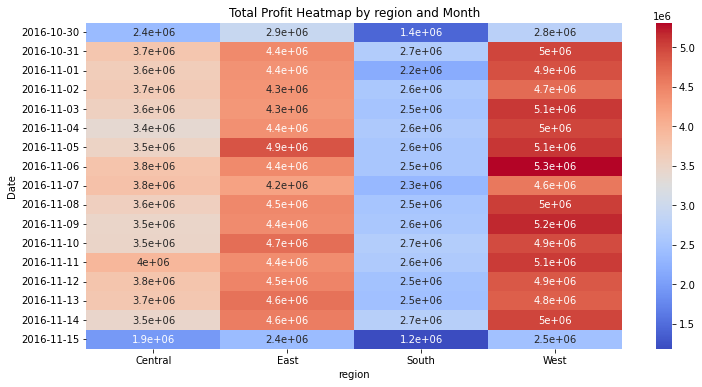

In [6]:
# Function to create heat map
def create_heatmap(data, column='region' ):
    """
    Creates a histogram with optional KDE plot.

    Parameters:
    -----------
    data : pandas DataFrame
        The input dataset
    column : str
        The column to be shown in x axis
    """
    # Using pivot_table() for aggregation
    pivot_table_df = df.pivot_table(index='invoice_date', columns=column, values='revenue', aggfunc=np.sum)


    # Create a heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_table_df, annot=True, cmap="coolwarm")

    # Add labels
    plt.xlabel(column)
    plt.ylabel("Date")
    plt.title(f"Total Profit Heatmap by {column} and Month")

    # Show plot
    plt.show()

print("Let's test our histogram function:")
create_heatmap(df)
plt.show()

##### Analysis
The West Region dominates the sales, follows by the East and the South comes last. If I am part of the management, I'd drill down to whether it's because of the population. The best way to do this is to have population data and see if the spending per person is the same across the region. 

On 11-15, the sales seem to be incomplete as the sales is about half of the previous days. 

Let's test our histogram function:


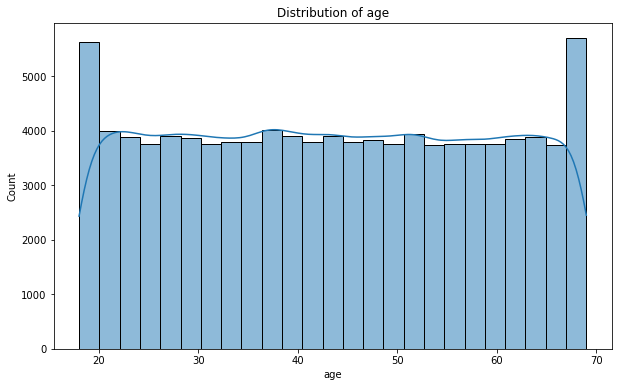

In [7]:
def create_histogram(data, column, bins=25, kde=True, title=None):
    """
    Creates a histogram with optional KDE plot.

    Parameters:
    -----------
    data : pandas DataFrame
        The input dataset
    column : str
        Column name to plot
    bins : int
        Number of bins for histogram
    kde : bool
        Whether to include KDE plot
    title : str
        Plot title (optional)
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, kde=kde, bins=bins)
    plt.title(title or f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

print("Let's test our histogram function:")
create_histogram(df, 'age')
plt.show()

#### Analysis
Customer age resemble the uniform distribution.


Testing box plot:


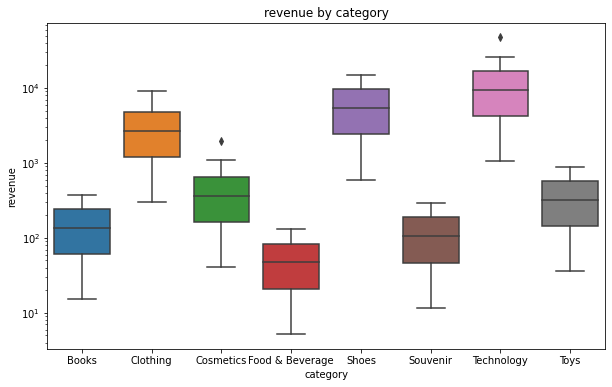

In [8]:
def create_boxplot(data, x_col, y_col, title=None):
    """
    Creates a box plot for comparing distributions.

    Parameters:
    -----------
    data : pandas DataFrame
        The input dataset
    x_col : str
        Column name for grouping
    y_col : str
        Column name for values
    title : str
        Plot title (optional)
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=x_col, y=y_col)
    plt.yscale("log")
    plt.title(title or f'{y_col} by {x_col}')

print("\nTesting box plot:")
create_boxplot(df, 'category', 'revenue')
plt.show()

#### Analysis
Most sales come from Technology following by Shoes and Clothing. On the other hand, Souvenir, Books, Food and Beverage are categories with the lowest sales.

Side note: the y axis is using log scale because there is a huge gap of sales between the highest and lowest. Log scale still allows me to compare, but less distort image.

## Creating dashboard elements
There are 3 elements I want to show in the dashboard:
- Age distribution of each gender
- Pie chart of the ditribution of region
- Line chart to show sales over time


Testing Distribution chart:


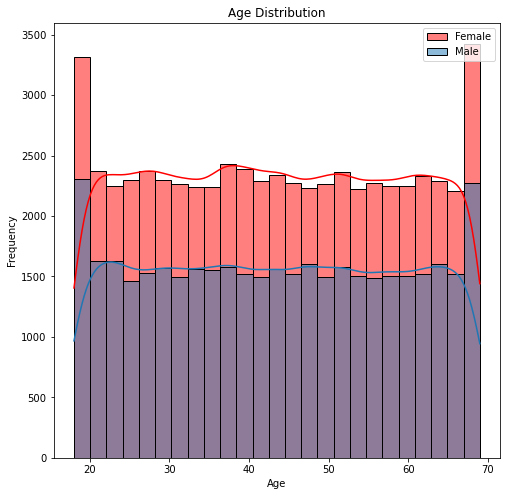

In [9]:
def create_age_dist_by_gender(data, bins=25, ax = None):
    """
    Creates a scatter plot with optional color grouping.

    Parameters:
    -----------
    data : pandas DataFrame
        The input dataset
    ax : axis
    """
    # split the data
    men = data.loc[data['gender'] == 'Male']
    women = data.loc[data['gender'] == 'Female']
    

    # Plot histograms
    plt.figure(figsize=(8, 8))
    sns.histplot(data=women, x='age', color = 'r', kde=True, bins=bins, alpha = 0.5, label='Female')
    sns.histplot(data=men, x='age', kde=True, bins=bins, label = 'Male')

    # Add labels and title
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Age Distribution')

    # Add legend
    plt.legend(loc='upper right')


print("\nTesting Distribution chart:")
create_age_dist_by_gender(df)
plt.show()


Testing pie chart:


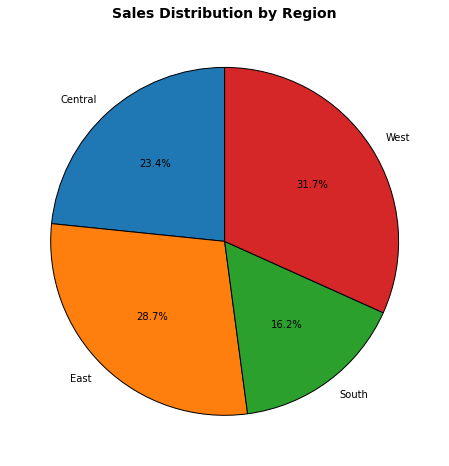

In [10]:
def create_pie(data, category, value, hue_col=None, title=None, ax=None):
    """
    Creates a scatter plot with optional color grouping.

    Parameters:
    -----------
    data : pandas DataFrame
        The input dataset
    category : str
        Name of category column
    value : str
        Column name for y-axis
    hue_col : str
        Column name for color grouping (optional)
    title : str
        Plot title (optional)
    """
    # Aggregation
    summary = data[value].groupby(data[category]).sum()
    

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        summary, labels=summary.index.to_list(), autopct="%1.1f%%"
        , startangle=90, wedgeprops={'edgecolor': 'black'}
    )

    # Add title
    plt.title("Sales Distribution by Region", fontsize=14, fontweight="bold")


print("\nTesting pie chart:")
create_pie(df, 'region','revenue')
plt.show()


Testing line plot:


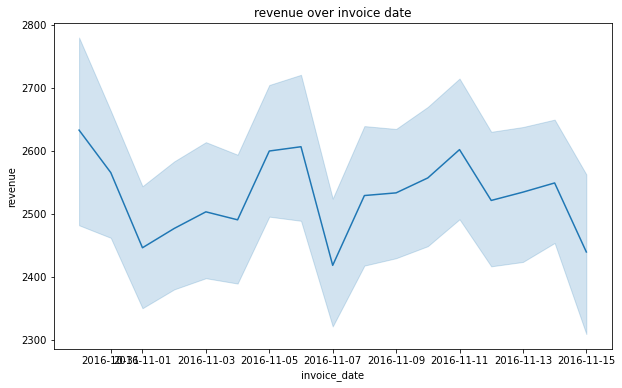

In [11]:
def create_lineplot(data, y_col, title=None):
    """
    Creates a line plot with confidence interval.

    Parameters:
    -----------
    data : pandas DataFrame
        The input dataset
    y_col : str
        Column name for y-axis
    title : str
        Plot title (optional)
    """
    x = df['invoice_date'].dt.to_timestamp()
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x=x, y=y_col)
    plt.title(title or f'{y_col} over invoice date')

print("\nTesting line plot:")
create_lineplot(df, 'revenue')
plt.show()

# Dashboard

Putting all together in a dashboard. I would like it to have a clean look, so the line plot will span 2 columns in the bottom row.


Testing our dashboard:


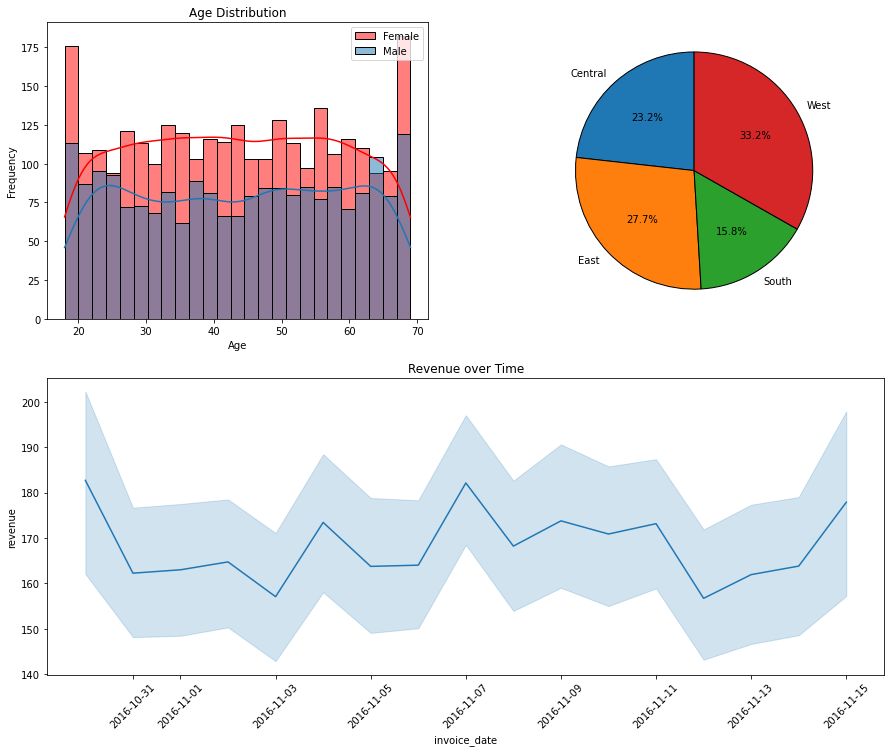

<Figure size 720x720 with 0 Axes>

In [12]:
def create_dashboard(data, category = 'Books'):
    """
    Creates a dashboard combining all our plot types.

    Parameters:
    -----------
    data : pandas DataFrame
        The input dataset
    """
    data = data.loc[data['category'] == category]
    fig = plt.figure(figsize=(15, 12))
    gs = fig.add_gridspec(2, 2)

    # Histogram
    ax1 = fig.add_subplot(gs[0, 0])
    #split the data
    men = data.loc[data['gender'] == 'Male']
    women = data.loc[data['gender'] == 'Female']
    sns.histplot(data=women, x='age', color = 'r', kde=True, bins=25, alpha = 0.5, label='Female', ax= ax1)
    sns.histplot(data=men, x='age', kde=True, bins=25, label = 'Male', ax=ax1)
    # Add labels and title
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Age Distribution')
    # Add legend
    plt.legend(loc='upper right')

    # Pie Chart
    ax3 = fig.add_subplot(gs[0, 1])
    # Aggregation
    summary = data['revenue'].groupby(data['region']).sum()
    # Create the pie chart
    ax3.pie(
        summary, labels=summary.index.to_list(), autopct="%1.1f%%"
        , startangle=90, wedgeprops={'edgecolor': 'black'}
    )

    

    # Line plot spans 2 columns
    ax4 = fig.add_subplot(gs[1, :])
    x = df['invoice_date'].dt.to_timestamp()
    plt.figure(figsize=(10, 10))
    sns.lineplot(data=data, x=x, y='revenue', markers = True, ax = ax4)
    ax4.tick_params(axis='x', rotation=45)
    ax4.set_title('Revenue over Time')

    plt.tight_layout()
    return fig

print("\nTesting our dashboard:")
create_dashboard(df)
plt.show()

## Interactive Dashboard

Now that I have a functioning dashboard, it's time for me to add interactive elements. In this exercice, I want to give users the ability to change the date range and select the category of interest. These two options are popular request in real world. It allows user to slice and dice.

For the date range, I am going to use the Selection Range Slider which is the bi-directional slicer. I am using Toggle Button for the category as I have 6 categories in this dataset. The amount of categories are small enough to not crowded the screen and reduce click count for users. 

In [13]:

def create_interactive_dashboard(data):
    """Creates an interactive dashboard with widgets for controlling the display."""

    # First, let's explore widget creation and understand the syntax


    # Create a range slider for year selection
    # IntRangeSlider provides two handles for selecting a range
    dates = list(data['invoice_date'].astype('str').unique())
    date_range = widgets.SelectionRangeSlider(
        options=dates,
        index = (0, len(dates)-1),
        description='Date Range: ',
        continuous_update=False, 
        disabled=False,
        style={'description_width': 'initial'}
    )
    
    # Types of goods Buttons
    goods = list(data['category'].unique())
    cat_dropdown = widgets.ToggleButtons(
        options=goods,        # List of numeric columns
        value='Books',                 # Default selection
        description='Category: ',     # Widget label
        style={'description_width': 'initial'}  # Make label width dynamic
    )
    
    # The update function that will be called whenever a widget value changes
    # This function must accept parameters matching the widget names we'll use with @interact
    def update(date_range, cat_dropdown):
        """
        Update function for our interactive dashboard.

        Parameters match the widget names we use with @interact below.
        Each parameter will receive the current value of its corresponding widget:
        - hist_col: string from hist_dropdown
        - scatter_x_col: string from scatter_x dropdown
        - scatter_y_col: string from scatter_y dropdown
        - year_range: tuple of (min, max) from year_range slider
        """
        # Filter data by year range
        # year_range is a tuple of (min, max) from the IntRangeSlider
        filtered_df = data[
            (data['invoice_date'] >= date_range[0]) &
            (data['invoice_date'] <= date_range[1])
        ]
        category = cat_dropdown
        # Clear previous output to avoid memory issues
        clear_output(wait=True)

        # Create and display the dashboard with current widget values
        fig = create_dashboard(
            filtered_df,    # Current scatter y-axis selection
            category
        )
        plt.show()

    # Connect widgets to the update function using interact

    # Method 1: Pass widget instances directly
    # - Each parameter name must match the function parameter names
    # - The widget instances we created above are passed as values
    interact(
        update,                    # Function to call when widgets change
        date_range=date_range,     # Maps year_range parameter to year_range widget
        cat_dropdown = cat_dropdown
    )
    
# Create and display our interactive dashboard
create_interactive_dashboard(df)

interactive(children=(SelectionRangeSlider(continuous_update=False, description='Date Range: ', index=(0, 16),…

First, I select category = 'Books' to verify the interactive dashboard is producing the same result as my dashboard testing above. 

![Books at full date range](Books.jpg "Books")

Since they do match, I continue to examine if the update function works when I change the category and date range. 
![Books from 5th to 12th of November](Books1.jpg "Books5-7")

The interactive dashboard is a useful tool for users to examine each catergory for specific date range. Upon toggle through all categories, I realize that the distribution or trend are very similar amongst all categories: women spent more than men, the West side made the most sales and sales over time is hovering a constant line.

## Next Steps
My next step is to find updated dataset to test out my interactive dashboard.

#### Rule et al's rules for computational analyses
I specifically attempted to implement these rules in my visualization development:

- Rule 1: Tell a story for an audience
- Rule 2: Document the process, not just the results
- Rule 3: Use cell divisions to make steps clear
- Rule 4: Modularize code

## Record Dependencies

Below are the dependencies for this notebook

In [ ]:
%load_ext watermark
%watermark -v -m -p pandas,numpy,ipywidgets,matplotlib, seaborn